In [21]:
# standard python code
import numpy as np
import sys
import scipy.constants as const
import psutil
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c  = const.c
me = me * 1e6
# Add WARGSim directory to path
sys.path.insert(0, "/home/keenan/WARGSim/")
from beams import electronbeam
from beams import betatronbeam
import calc.electron as ecalc
from elements import pwfa as pwfa
from interactions import interactions

import prop_plasma as pp
import read_data as rd

In [2]:
# define electron beam
Nb     = int(1e5)
me     = const.physical_constants['electron mass energy equivalent in MeV'][0]*(1e6)
beamE  = 10e9 # beam energy in eV
eps_n0 = 3.0e-6 #m-rad, normalized emittance
beta_x0 = 0.10 #m, x beta function at z=0
beta_y0 = 0.10 #m, y beta function at z=0
alpha_x0 = 0.0 # x alpha function at z=0
alpha_y0 = 0.0 # y alpha function at z=0
rms_z0 = 0.00 # m, rms bunch length
rms_gb0 = 0.01 # relative energy spread

n0 = 0.34

beam_params = {
    "N" : Nb,
    "beamE" : beamE,
    "eps_n0" : eps_n0,
    "beta0"  : [beta_x0, beta_y0],
    "alpha0" : [alpha_x0, alpha_y0],
    "rms_z0" : rms_z0,
    "rms_gb0" : rms_gb0,
    "path"    : "/home/keenan/Documents/data/Wargsim/dumps",
    "B_mag"   : 1
}
path = "/home/keenan/Documents/data/Wargsim/dumps/"
hw_dn = 0.15
plasma_params = {
    "n0"    : n0,
    "L_ft"  : 0.4,
    "hw_up" : 0.0,
    "L_up"  : 0,
    "shape" : "Gauss",
    "hw_dn" : 0.15,
    "L_dn"  : min(1.600,8*hw_dn)
}

In [3]:
pp.propagate(beam_params, plasma_params, dumpPeriod =int(10), name = "test_run")

beta factor = 17.53
Bmag = 8.79
init eps_nx =  2.9986842813334665e-06
init eps_ny =  2.991999256772102e-06


In [17]:
pwfa0   = pp.init_plasma(beam_params, plasma_params)
len(pwfa0.dz)

2802

In [22]:
pwfa0.dz[0] / c

1.9047200296825244e-12

In [3]:
x, xp, y, yp, z, gb = rd.read_data(path + "test_run", 281, Nb)

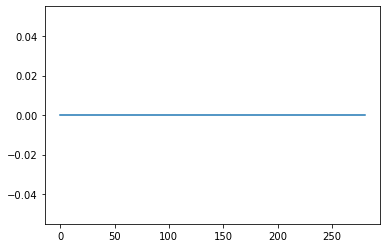

In [12]:
import matplotlib.pyplot as plt
plt.plot(z[:, 0])
plt.show()

In [6]:
np.shape(x)

(281, 100000)

In [9]:
x[:, 0]

array([ 1.61179213e-07,  4.19247801e-07,  2.90455864e-07, -1.02460109e-07,
       -4.00044773e-07, -3.35919622e-07,  2.78273047e-08,  3.64595290e-07,
        3.78081524e-07,  6.07075825e-08, -3.07449792e-07, -4.07975908e-07,
       -1.58114470e-07,  2.24880524e-07,  4.15301316e-07,  2.55525003e-07,
       -1.16657447e-07, -3.89844383e-07, -3.40079305e-07, -1.20837639e-08,
        3.23824577e-07,  3.95911963e-07,  1.49430146e-07, -2.14964699e-07,
       -4.06667784e-07, -2.76517516e-07,  6.96657692e-08,  3.59617303e-07,
        3.69436557e-07,  9.48081521e-08, -2.50845141e-07, -4.03783788e-07,
       -2.50553297e-07,  9.01907753e-08,  3.61680995e-07,  3.62970447e-07,
        9.61154442e-08, -2.39909707e-07, -3.98940275e-07, -2.67432061e-07,
        5.64898249e-08,  3.38154444e-07,  3.76901459e-07,  1.47823095e-07,
       -1.84459071e-07, -3.85494496e-07, -3.16255555e-07, -2.76785769e-08,
        2.78562739e-07,  3.91833827e-07,  2.36705376e-07, -7.85876032e-08,
       -3.39167154e-07, -